In [1]:
from Prepro_EMG import *
from Prepro_filters import *
import glob, os
import pandas as pd
from selection_channels import *
from ast import literal_eval
from collections import Counter
from sklearn.decomposition import PCA

In [ ]:
#run for choosing te channels to reject and do the whole preprocessing
# select_channels(['A','B','C','D','E','F','G','H','I','J','K','L','M','MY','N','O','P','Q','R','S'], 10240,0.04)

In [2]:
let_index= ['A','B','C','D','E','F','G','H','I','J','K','L','M','MY','N','O','P','Q','R','S'] #letters sign language
grids= ['_grid1','_grid2','_grid3'] #different grids
for i in range(len(let_index)):
    for j in range(3): #number of grids
        file_name= 'rate'+let_index[i]+grids[j]
        path='C:/Users/natal/Desktop/2022-2023/PhD_Q1/Natalia/EMG/'+file_name+'.csv'

        exec(file_name + " = pd.read_csv(path,header=None)")  # Igualar la variable a los datos deseados


In [3]:
chan_to_reject= pd.read_csv('C:/Users/natal/Desktop/2022-2023/PhD_Q1/Natalia/EMG/chan_to_rej.csv', header=None)
chan_to_reject

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A,B,C,D,E,F,G,H,I,J,K,L,M,MY,N,O,P,Q,R,S
1,"[8, 9, 10, 11, 12]","[8, 9, 10, 11, 12, 58]","[8, 9, 10, 11, 12, 58]","[8, 9, 10, 11, 12]","[8, 9, 10, 11, 12, 58]","[8, 9, 10, 11, 12, 58]","[8, 9, 10, 11, 12, 58]","[8, 9, 10, 11, 12, 58]","[8, 9, 10, 11, 12, 13, 31, 32, 33, 34, 41, 42,...","[8, 9, 10, 11, 12, 13]","[8, 9, 10, 11, 12, 13]","[8, 9, 10, 11, 12, 13, 58]","[8, 9, 10, 11, 12, 13, 58]","[7, 8, 9, 10, 11, 12, 13, 14, 17, 30, 31, 32, ...","[8, 9, 10, 11, 12, 13, 58]","[8, 9, 10, 11, 12, 13, 58]","[8, 9, 10, 11, 12, 13, 37, 58]","[8, 9, 10, 11, 12, 13, 58]","[8, 9, 10, 11, 12, 13, 58]","[8, 9, 10, 11, 12, 13, 58]"
2,[50],"[7, 8, 9, 11, 12, 24, 48, 49, 50, 51]",[50],"[50, 62]","[7, 8, 9, 50, 51, 62]","[6, 7, 8, 9, 10, 11, 50, 51, 62]","[50, 51]","[50, 51]","[9, 50, 51]","[50, 51]","[50, 51]","[50, 51]","[50, 51]","[50, 51, 52]","[50, 51]","[50, 51]","[50, 51, 52]","[7, 50, 51, 52]","[50, 51, 52]","[8, 50, 51, 52]"
3,"[10, 11, 36, 37, 38, 41, 60, 61, 62]",[41],[41],[41],[41],[41],[41],"[10, 11, 36, 37, 38, 41, 60, 61, 62]","[10, 11, 36, 37, 38, 41, 60, 61, 62]","[10, 11, 36, 37, 38, 41, 60, 61, 62]",[],[],[],[10],[],[],[0],[],[],[]


In [4]:
discard_1=[]; discard_2=[]; discard_3=[]
for i in range(1,4): #3 grids
    
    crej_letter=chan_to_reject.iloc[i]

    for j in range(len(let_index)):
        let= literal_eval(crej_letter[j]) #choose a letter and take the channels f the df
        if i==1:
            discard_1.append(let)
        elif i==2:
            discard_2.append(let)
        elif i==3:
            discard_3.append(let)

discard_1=np.concatenate(discard_1)
# discard_1 = list(set(discard_1))
discard_2=np.concatenate(discard_2)
# discard_2 = list(set(discard_2))
discard_3=np.concatenate(discard_3)
# discard_3 = list(set(np.int64(discard_3)))
                

Text(0.5, 1.0, 'Histogram -> Channels to Reject across dataset')

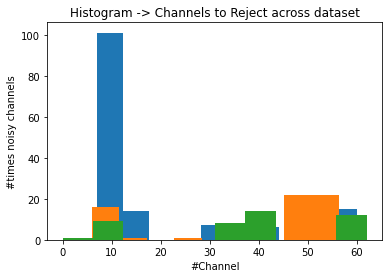

In [5]:
plt.hist(discard_1)
plt.hist(discard_2)
plt.hist(discard_3)
plt.xlabel('#Channel')
plt.ylabel('#times noisy channels')
plt.title('Histogram -> Channels to Reject across dataset')

In [6]:

d1= []
d = Counter(discard_1)
for i in range(rateA_grid1.shape[0]):
    if d[i] > np.round(0.8*chan_to_reject.shape[1]):
        d1.append(i)

d2= []
d = Counter(discard_2)
for i in range(rateA_grid2.shape[0]):
    if d[i] > np.round(0.8*chan_to_reject.shape[1]):
        d2.append(i)

d3= []
d = Counter(discard_3)
for i in range(rateA_grid3.shape[0]):
    if d[i] > np.round(0.8*chan_to_reject.shape[1]):
        d3.append(i)

print(f'Discarded channels Grid1 {d1}')
print(f'Discarded channels Grid2 {d2}')
print(f'Discarded channels Grid3 {d3}')



Discarded channels Grid1 [8, 9, 10, 11, 12]
Discarded channels Grid2 [50, 51]
Discarded channels Grid3 []


In [7]:

rateA1= rateA_grid1.drop(d1).to_numpy()
rateB1= rateB_grid1.drop(d1).to_numpy()
rateC1= rateC_grid1.drop(d1).to_numpy()
rateD1= rateD_grid1.drop(d1).to_numpy()
rateE1= rateE_grid1.drop(d1).to_numpy()
rateF1= rateF_grid1.drop(d1).to_numpy()
rateG1= rateG_grid1.drop(d1).to_numpy()
rateH1= rateH_grid1.drop(d1).to_numpy()
rateI1= rateI_grid1.drop(d1).to_numpy()
rateJ1= rateJ_grid1.drop(d1).to_numpy()
rateK1= rateK_grid1.drop(d1).to_numpy()
rateL1= rateL_grid1.drop(d1).to_numpy()
rateM1= rateM_grid1.drop(d1).to_numpy()
rateMY1=rateMY_grid1.drop(d1).to_numpy()
rateN1= rateN_grid1.drop(d1).to_numpy()
rateO1= rateO_grid1.drop(d1).to_numpy()
rateP1= rateP_grid1.drop(d1).to_numpy()
rateQ1= rateQ_grid1.drop(d1).to_numpy()
rateR1= rateR_grid1.drop(d1).to_numpy()
rateS1= rateS_grid1.drop(d1).to_numpy()



rateA2= rateA_grid2.drop(d2).to_numpy()
rateB2= rateB_grid2.drop(d2).to_numpy()
rateC2= rateC_grid2.drop(d2).to_numpy()
rateD2= rateD_grid2.drop(d2).to_numpy()
rateE2= rateE_grid2.drop(d2).to_numpy()
rateF2= rateF_grid2.drop(d2).to_numpy()
rateG2= rateG_grid2.drop(d2).to_numpy()
rateH2= rateH_grid2.drop(d2).to_numpy()
rateI2= rateI_grid2.drop(d2).to_numpy()
rateJ2= rateJ_grid2.drop(d2).to_numpy()
rateK2= rateK_grid2.drop(d2).to_numpy()
rateL2= rateL_grid2.drop(d2).to_numpy()
rateM2= rateM_grid2.drop(d2).to_numpy()
rateMY2=rateMY_grid2.drop(d2).to_numpy()
rateN2= rateN_grid2.drop(d2).to_numpy()
rateO2= rateO_grid2.drop(d2).to_numpy()
rateP2= rateP_grid2.drop(d2).to_numpy()
rateQ2= rateQ_grid2.drop(d2).to_numpy()
rateR2= rateR_grid2.drop(d2).to_numpy()
rateS2= rateS_grid2.drop(d2).to_numpy()



rateA3= rateA_grid3.drop(d3).to_numpy()
rateB3= rateB_grid3.drop(d3).to_numpy()
rateC3= rateC_grid3.drop(d3).to_numpy()
rateD3= rateD_grid3.drop(d3).to_numpy()
rateE3= rateE_grid3.drop(d3).to_numpy()
rateF3= rateF_grid3.drop(d3).to_numpy()
rateG3= rateG_grid3.drop(d3).to_numpy()
rateH3= rateH_grid3.drop(d3).to_numpy()
rateI3= rateI_grid3.drop(d3).to_numpy()
rateJ3= rateJ_grid3.drop(d3).to_numpy()
rateK3= rateK_grid3.drop(d3).to_numpy()
rateL3= rateL_grid3.drop(d3).to_numpy()
rateM3= rateM_grid3.drop(d3).to_numpy()
rateMY3=rateMY_grid3.drop(d3).to_numpy()
rateN3= rateN_grid3.drop(d3).to_numpy()
rateO3= rateO_grid3.drop(d3).to_numpy()
rateP3= rateP_grid3.drop(d3).to_numpy()
rateQ3= rateQ_grid3.drop(d3).to_numpy()
rateR3= rateR_grid3.drop(d3).to_numpy()
rateS3= rateS_grid3.drop(d3).to_numpy()




In [8]:
grid1_concat_rates=np.concatenate((rateA1,rateB1,rateC1,rateD1,rateE1,rateF1,rateG1,rateH1,rateI1,rateJ1,rateK1,rateL1,rateM1,rateMY1,rateN1,rateO1,rateP1,rateQ1,rateR1,rateS1),axis=1)

grid2_concat_rates=np.concatenate((rateA2,rateB2,rateC2,rateD2,rateE2,rateF2,rateG2,rateH2,rateI2,rateJ2,rateK2,rateL2,rateM2,rateMY2,rateN2,rateO2,rateP2,rateQ2,rateR2,rateS2),axis=1)

grid3_concat_rates=np.concatenate((rateA3,rateB3,rateC3,rateD3,rateE3,rateF3,rateG3,rateH3,rateI3,rateJ3,rateK3,rateL3,rateM3,rateMY3,rateN3,rateO3,rateP3,rateQ3,rateR3,rateS3),axis=1)

In [9]:
all_grids= np.concatenate((grid1_concat_rates,grid2_concat_rates,grid3_concat_rates),axis=0)

In [100]:
all_grids.shape

(183, 25714)

In [10]:
pca = PCA(n_components=5)
pca_latents= (pca.fit_transform(all_grids.T)).T
print(pca.explained_variance_ratio_)

[0.89056817 0.07080218 0.01622737 0.00362582 0.00332745]


[Text(0, 0.4, '40'),
 Text(0, 0.6, '60'),
 Text(0, 0.8, '80'),
 Text(0, 1.0, '100')]

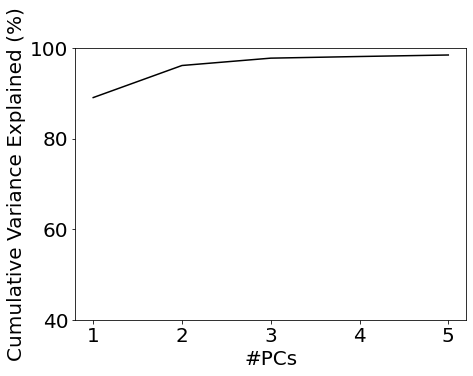

In [11]:
## Plot explained variance


fig, ax = plt.subplots(figsize=(7,5))

ax.plot(np.cumsum(pca.explained_variance_ratio_), linestyle='solid', c='black')
ax.set_xlabel("#PCs",fontsize=20)
ax.set_ylabel("Cumulative Variance Explained (%)",fontsize=20)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels([1,2,3,4,5],fontsize=20)


ax.set_yticks([0.4,0.6,0.8,1])
ax.set_yticklabels([40,60,80,100],fontsize=20)


In [12]:

lengths=[rateA1.shape[1],rateB1.shape[1],rateC1.shape[1],rateD1.shape[1],rateE1.shape[1],rateF1.shape[1], rateG1.shape[1],rateH1.shape[1],rateI1.shape[1],rateJ1.shape[1],rateK1.shape[1],rateL1.shape[1],rateM1.shape[1],rateMY1.shape[1],rateN1.shape[1],rateO1.shape[1],rateP1.shape[1],rateQ1.shape[1],rateR1.shape[1],rateS1.shape[1]]

len(lengths)


20

In [25]:
arr=lengths[0:3]
np.sum(arr)

3311

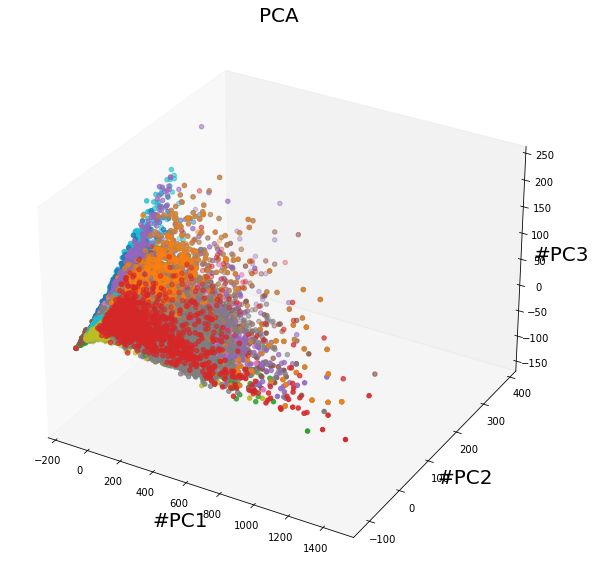

In [98]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# colors=['pink','mediumorchid','magenta','purple','pink','mediumorchid','magenta','purple']
for i in range(0,20):
    if i==0:
        ax.scatter(pca_latents[0,:lengths[i]],pca_latents[1,:lengths[i]],pca_latents[2,:lengths[i]]) 
    else:
        limit_d= np.int64(np.sum(lengths[0:i-1]))
        limit_u= np.int64(np.sum(lengths[0:i]))
        ax.scatter(pca_latents[0,limit_d:limit_u],pca_latents[1,limit_d:limit_u],pca_latents[2,limit_d:limit_u]) 

    ax.grid(False)

    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.set_zticks([])

    ax.set_xlabel('#PC1',fontsize=20)
    ax.set_ylabel('#PC2',fontsize=20)
    ax.set_zlabel('#PC3',fontsize=20)
    ax.set_title('PCA',fontsize=20)

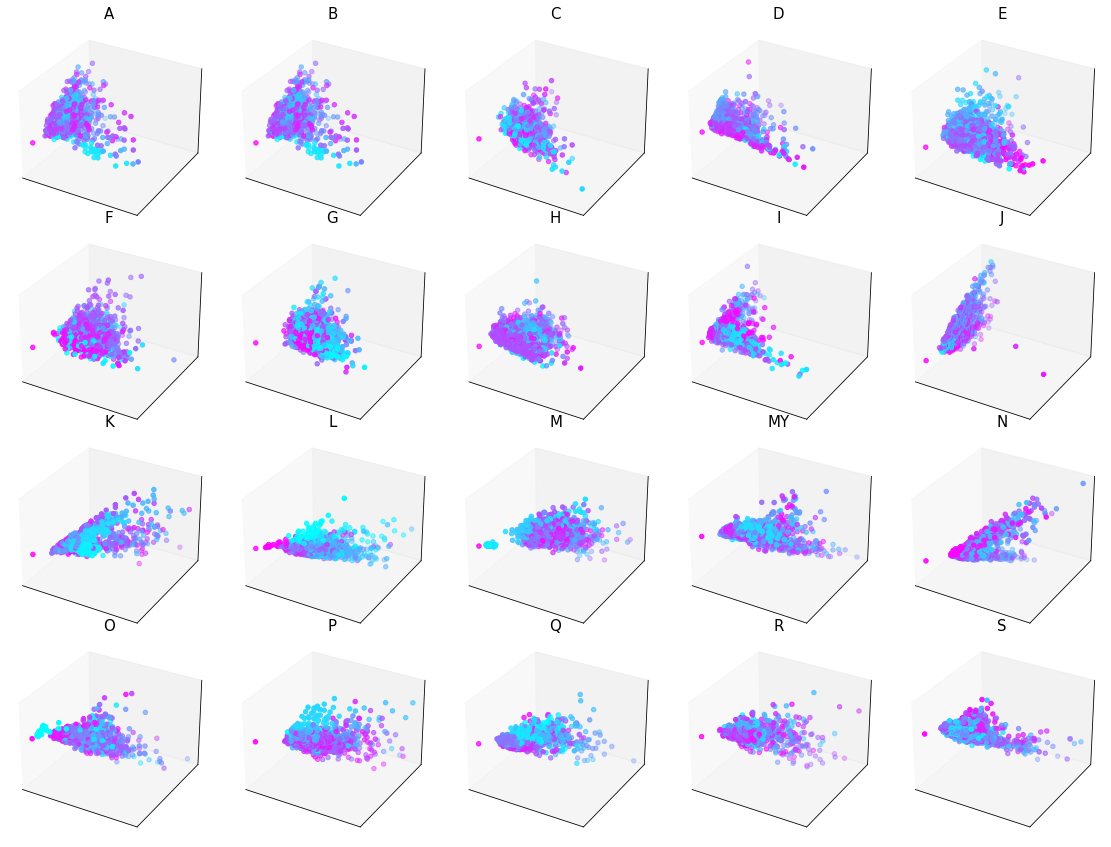

In [97]:
# fig,ax = plt.subplots(figsize = (20,10), ncols = 2, nrows = 10)
# ax = plt.axes(projection='3d')

fig = plt.figure(figsize = (20,15))
 
# Creating our empty subplots

for i in range(0,20):
    if i==0:
        t= np.arange(lengths[i])
        ax = fig.add_subplot(4, 5, i+1, projection='3d')
        ax.scatter(pca_latents[0,:lengths[i]],pca_latents[1,:lengths[i]],pca_latents[2,:lengths[i]],c=t,cmap='cool' )

    else:
        ax = fig.add_subplot(4, 5, i+1, projection='3d')
        limit_d= np.int64(np.sum(lengths[0:i-1]))
        limit_u= np.int64(np.sum(lengths[0:i]))
        t= np.arange(limit_u-limit_d)

        ax.scatter(pca_latents[0,limit_d:limit_u],pca_latents[1,limit_d:limit_u],pca_latents[2,limit_d:limit_u],c=t,cmap ='cool',) 


    ax.grid(False)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # ax.set_xlabel('#PC1',fontsize=20)
    # ax.set_ylabel('#PC2',fontsize=20)
    # ax.set_zlabel('#PC3',fontsize=20)
    ax.set_title(f'{let_index[i]}',fontsize=15)
plt.subplots_adjust(wspace=0, hspace=0)




# plt.pie([2 for i in range(50)], colors = get_color_gradient(color1, color2, len(age_dict)))

In [93]:
limit_u

2057